<a href="https://colab.research.google.com/github/yellayujin/mulcamp34/blob/main/240108_Pandas(1)%2C_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas(1)

## 데이터 통합하기(p.266)
- 원리 중요
- https://r4ds.had.co.nz/relational-data.html
- 분석 목적에 따른 메서드 결정을 위해 ERD 설계 선행
- 분석 주제 정의->데이터 수정->테이블 정의서->ERD 설계->코드 실행
- https://mjn5027.tistory.com/43

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({
    'Class1' : [95,92,98,100],
    'Class2' : [91,93,97,99]
})

df2 = pd.DataFrame({
    'Class1' : [87, 89],
    'Class2' : [85, 90]
})

print(df1)
print(df2)

   Class1  Class2
0      95      91
1      92      93
2      98      97
3     100      99
   Class1  Class2
0      87      85
1      89      90


### append
- 단순 덧붙이는 개념
- but Deprecated since version 1.4.0: Use concat() instead. For further details see Deprecated DataFrame.append and Series.append
- Pandas 버전을 낮추거나, 새로운 버전에 맞추어 코드 수정


In [ ]:
pd.__version__

'1.5.3'

### concat
- pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)
- 서로 다른 데이터프레임들의 구성 형태와 속성이 균일할 때
- 데이터프레임을 원소로 갖는 리스트를 전달하면 여러 개의 데이터프레임을 서로 연결
- 연결되었는지 rough하게 확인하는 방법: shape(), head()와 tail() 확인 등

In [ ]:
pd.concat([df1, df2])

,Class1,Class2
0,95,91
1,92,93
2,98,97
3,100,99
0,87,85
1,89,90


In [ ]:
df3 = pd.DataFrame({'Class1':[96, 83]})
df3

,Class1
0,96
1,83


In [ ]:
pd.concat([df1,df2, df3], join='outer')    # 인덱스 순서 이상해!

,Class1,Class2
0,95,91.0
1,92,93.0
2,98,97.0
3,100,99.0
0,87,85.0
1,89,90.0
0,96,NaN
1,83,NaN


In [ ]:
pd.concat([df1,df2, df3], join='outer', ignore_index=True)     # 추가로 reset_index쓸 필요 없음

,Class1,Class2
0,95,91.0
1,92,93.0
2,98,97.0
3,100,99.0
4,87,85.0
5,89,90.0
6,96,NaN
7,83,NaN


In [ ]:
pd.concat([df1, df3], ignore_index = True, join='inner')

,Class1
0,95
1,92
2,98
3,100
4,96
5,83


### join
- 가로 방향으로 통합하기

In [ ]:
df4 = pd.DataFrame({'Class3': [93, 91, 95, 98]})
df1.join(df4)

,Class1,Class2,Class3
0,95,91,93
1,92,93,91
2,98,97,95
3,100,99,98


In [ ]:
index_label = ['a','b','c','d']
df1a = pd.DataFrame({'Class1': [95, 92, 98, 100],
                    'Class2': [91, 93, 97, 99]}, index= index_label)
df4a = pd.DataFrame({'Class3': [93, 91, 95, 98]}, index=index_label)    # 인덱스를 특정 리스트로

df1a.join(df4a)

,Class1,Class2,Class3
a,95,91,93
b,92,93,91
c,98,97,95
d,100,99,98


In [ ]:
# 인덱스 번호가 불일치하면?
index_label = ['a','b','c','d']
df1a = pd.DataFrame({'Class1': [95, 92, 98, 100],
                    'Class2': [91, 93, 97, 99]})
df4a = pd.DataFrame({'Class3': [93, 91, 95, 98]}, index=index_label)

df1a.join(df4a)

# => 인덱스 형태가 같은지 체크!

,Class1,Class2,Class3
0,95,91,NaN
1,92,93,NaN
2,98,97,NaN
3,100,99,NaN


In [ ]:
df4.index == df1.index   # 인덱스 동일 여부 확인

array([ True,  True,  True,  True])

In [ ]:
df1a.index == df4a.index

array([False, False, False, False])

### merge()
- SQL 문법


In [ ]:
df_A_B = pd.DataFrame({'판매월': ['1월', '2월', '3월', '4월'],
                       '제품A': [100, 150, 200, 130],
                       '제품B': [90, 110, 140, 170]})

df_C_D = pd.DataFrame({'판매월': ['1월', '2월', '3월', '4월'],
                       '제품C': [112, 141, 203, 134],
                       '제품D': [90, 110, 140, 170]})
df_A_B

,판매월,제품A,제품B
0,1월,100,90
1,2월,150,110
2,3월,200,140
3,4월,130,170


In [ ]:
df_C_D

,판매월,제품C,제품D
0,1월,112,90
1,2월,141,110
2,3월,203,140
3,4월,134,170


In [ ]:
df_A_B.merge(df_C_D)   # way1

,판매월,제품A,제품B,제품C,제품D
0,1월,100,90,112,90
1,2월,150,110,141,110
2,3월,200,140,203,140
3,4월,130,170,134,170


In [ ]:
df_A_B.join(df_C_D)   # Error: 중복되는 인덱스 있으면 안 들어가므로 먼저 지운 후 하든 해야

In [ ]:
pd.merge(df_A_B, df_C_D)   # way2

,판매월,제품A,제품B,제품C,제품D
0,1월,100,90,112,90
1,2월,150,110,141,110
2,3월,200,140,203,140
3,4월,130,170,134,170


In [ ]:
df_left = pd.DataFrame({'key':['A','B','C'], 'left': [1, 2, 3]})
df_right = pd.DataFrame({'key':['A','B','D'], 'right': [4, 5, 6]})

In [ ]:
pd.read_csv('data/sea_rain1_from_notepad.csv', encoding='cp949')  # csv 인코딩

,연도,동해,남해,서해,전체
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
score1 = pd.read_excel('data/학생시험성적.xlsx', header=0)
score1

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


In [ ]:
score2 = pd.read_excel('data/학생시험성적.xlsx', header=0, sheet_name='2차시험', index_col='학생')   # 2차시험 시트만 불러옴(코드북 불러올 때 용이할듯)

In [ ]:
# ExcelWriter
!pip install xlsxwriter

In [ ]:
canvas = pd.ExcelWriter('whichIdid.xlsx', engine='xlsxwriter')
score2.to_excel(canvas, sheet_name='didI')
canvas.close()

In [ ]:
score1.to_excel('ssss.xlsx', sheet_name='ss')

# Visualization
- 모든 메서드와 파라미터를 완벽히 숙지할 순 없으니 필요할 때마다 공식문서 꼼꼼히 확인!
- https://matplotlib.org/stable/users/explain/axes/arranging_axes.html 등

## 산점도

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

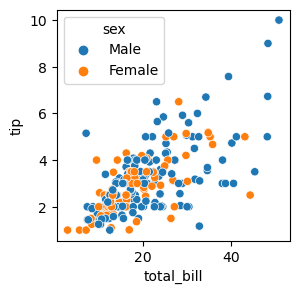

In [ ]:
tips = sns.load_dataset('tips')

fig, ax = plt.subplots(figsize=(3,3))
sns.scatterplot(x= 'total_bill', y='tip', hue= 'sex', data=tips)   # hue: 구분변수, ax=: Seaborn과 Matplotlib 연동시 사용
# e.g. sns.scatterplot(x= 'total_bill', y='tip', hue= 'sex', ax = ax[1,0], data=tips)
plt.savefig('output.png')  # 이미지 저장
plt.show()                 # 맨 마지막에

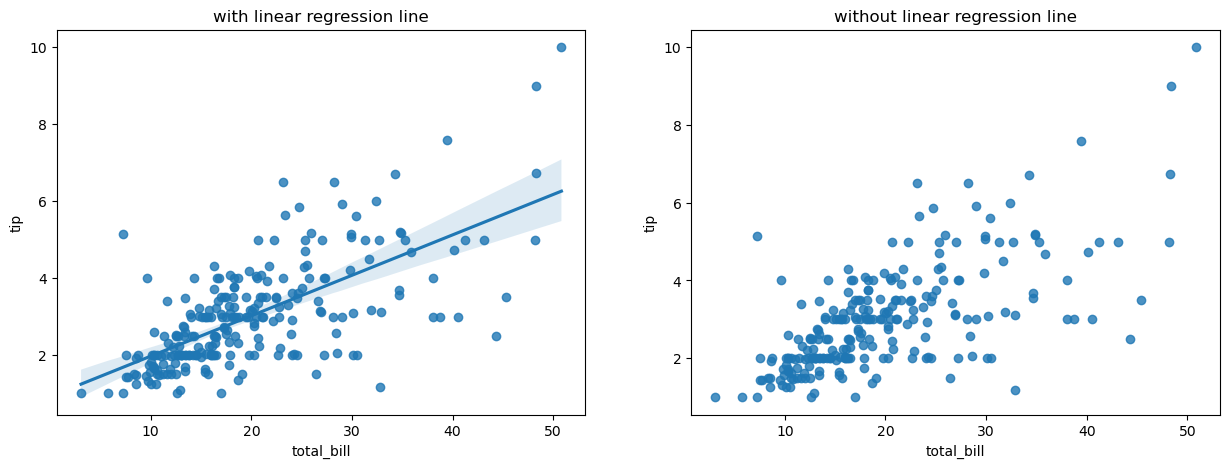

In [ ]:
# 회귀선 옵션
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

plt.show()

## Matplotlib과 seaborn을 동시에 사용한 subplotting기법
- 다중차트를 하나의 도화지에

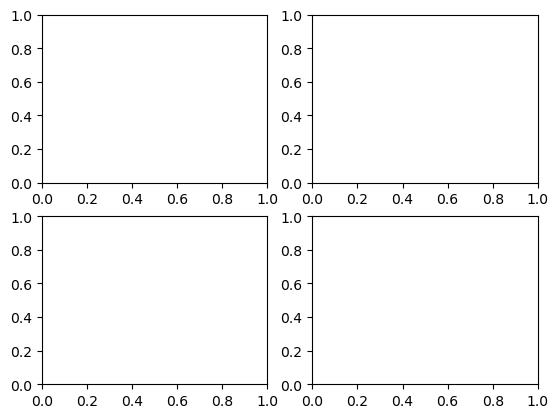

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

plt.show()

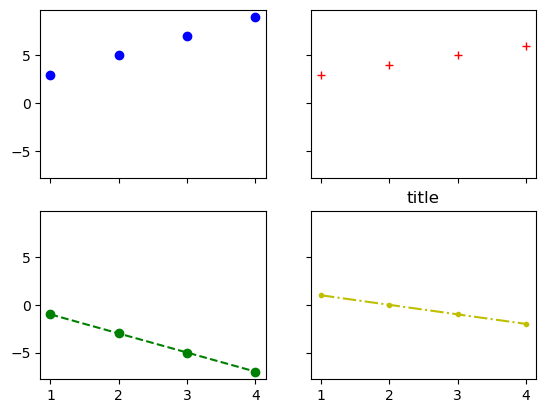

In [ ]:
x = np.arange(1,5)    # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
plt.title('title')  # 우측 상단으로 가버림 => 쓸 수 없음
ax[0][0].plot(x, 2*x+1, 'bo')
ax[0][1].plot(x, x+2, 'r+')
ax[1][0].plot(x, (-2)*x+1, 'go--')
ax[1][1].plot(x, -x+2, 'y.-.')
plt.show()

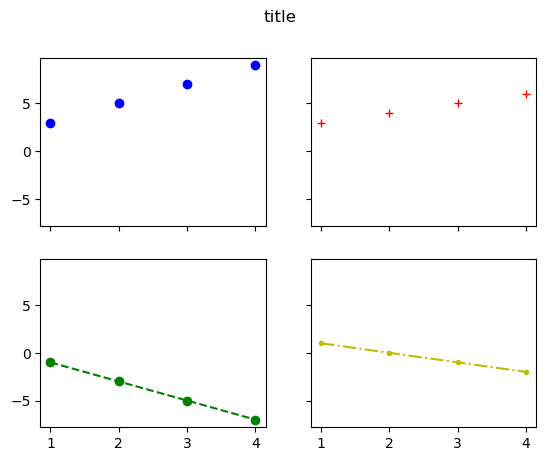

In [ ]:
x = np.arange(1,5)    # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
plt.suptitle('title')  # 전체 타이틀
ax[0][0].plot(x, 2*x+1, 'bo')
ax[0][1].plot(x, x+2, 'r+')
ax[1][0].plot(x, (-2)*x+1, 'go--')
ax[1][1].plot(x, -x+2, 'y.-.')
plt.show()

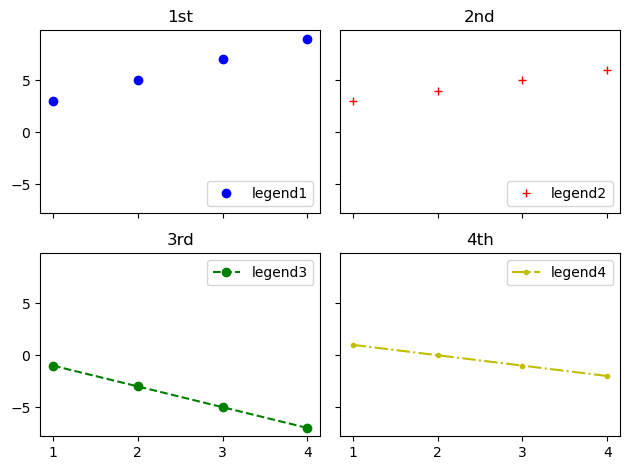

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0][0].plot(x, 2*x+1, 'bo', label='legend1')
ax[0][0].set_title('1st')
ax[0][0].legend(loc='lower right')

ax[0][1].plot(x, x+2, 'r+', label='legend2')
ax[0][1].set_title('2nd')
ax[0][1].legend(loc='lower right')

ax[1][0].plot(x, (-2)*x+1, 'go--', label='legend3')
ax[1][0].set_title('3rd')
ax[1][0].legend(loc='best')

ax[1][1].plot(x, -x+2, 'y.-.', label='legend4')
ax[1][1].set_title('4th')
ax[1][1].legend(loc='best')

plt.tight_layout()  # 조금 여유있게 들어감

plt.show()

## 히스토그램

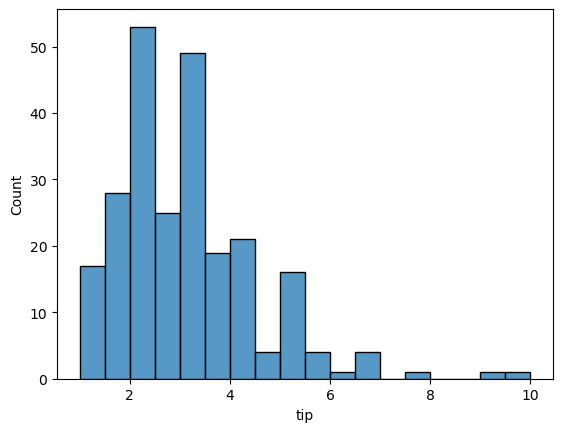

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x='tip', ax=ax, data = tips)
plt.show()

# `distplot` is a deprecated function and will be removed in seaborn v0.14.0. Please adapt your code to use either 'distplot' or 'histplot'.

C:\Users\skrtk\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


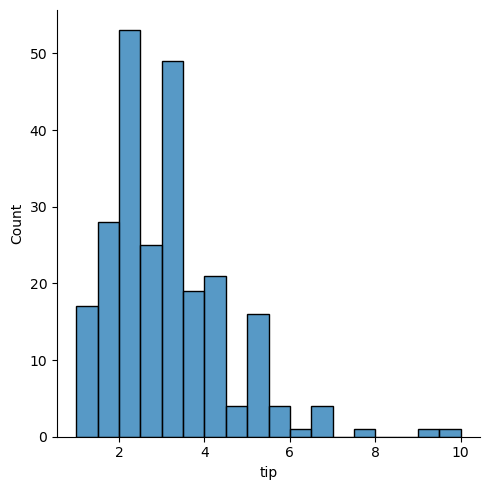

In [ ]:
sns.displot(tips, x='tip', ax=ax)

## 박스플롯

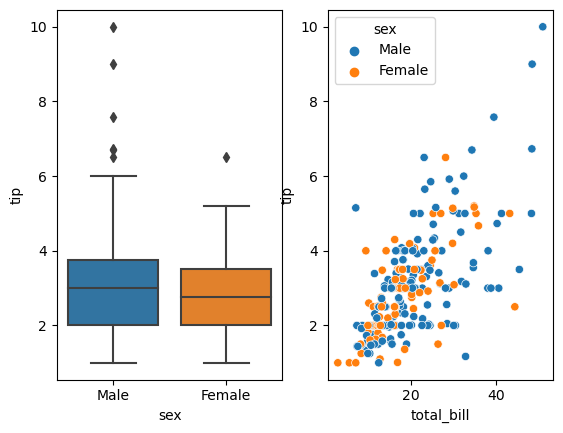

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2)

sns.boxplot(x = 'sex', y = 'tip', data = tips, ax = ax[0])
sns.scatterplot(x = 'total_bill', y = 'tip', hue='sex', data = tips, ax = ax[1])
plt.show()

# 평균적(중앙값기준 50%)으로는 차이 별로 없고, 일부 남성은 tip 많이. => 하나의 차트만 보고 섣불리 해석하면 안됨.

## Swarmplot

C:\Users\skrtk\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\skrtk\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


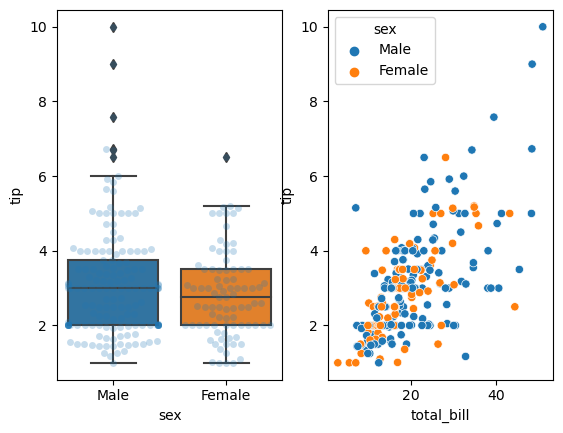

In [ ]:
# swarmplot
fig, ax = plt.subplots(nrows = 1, ncols = 2)

sns.boxplot(x = 'sex', y = 'tip', ax = ax[0], data = tips)
sns.swarmplot(x = 'sex', y = 'tip', ax = ax[0], data = tips, alpha=0.25)
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1], data = tips)
plt.show()

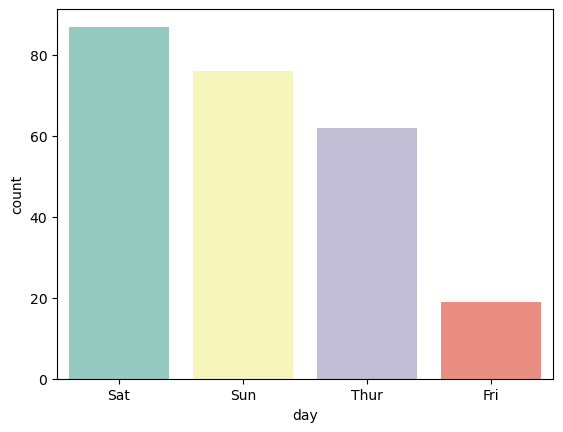

In [ ]:
sns.countplot(x='day', data=tips, palette = 'Set3', order= tips['day'].value_counts().index) # count가 큰 순서대로 정렬
plt.show()

In [ ]:
tips['day'].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

## 가독성을 높이는 시각화
- https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/

In [ ]:
# 라이브러리 가져오기
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)   # 축 설정할 때의 값
import seaborn as sns
import numpy as np

In [ ]:
# 데이터 불러오기
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 사용자 정의 함수 만들기
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)
  # y축 설정할 때, 값을 소수점 둘째자리까지 표현

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


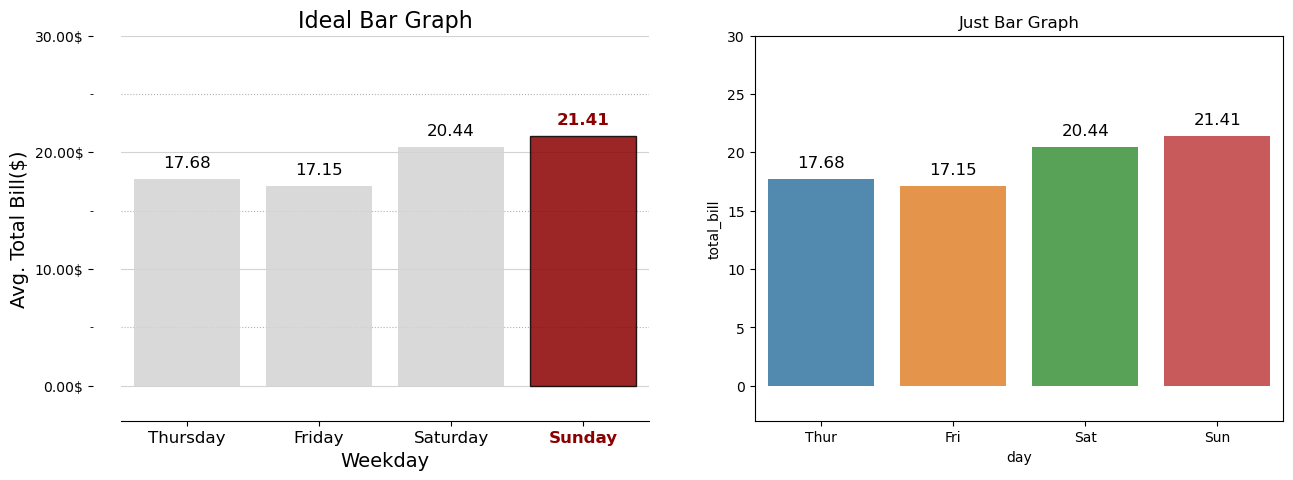

In [ ]:
# 객체 지향 선언
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(15,5))

 # 이상적인 막대 그래프
 # 세미프로젝트 할 때, 각 시각화자료는 대조/비교가 명확하게 가능해야!
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, color='lightgray', alpha=0.85, zorder=2, ax=ax[0])  # zorder: 배경 그리드 선이 막대 뒤로 간 걸로 보이게

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]            # 해당되는 결과값의 max의 인덱스 요일을 가져옴
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)    #  # 해당되는 결과값의 max를 소수점 둘째자리에서 반올림
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)       # 여기랑
    p.set_edgecolor("black")     # 여기랑
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)  # fontweight, color 옵션이 추가됨(아래에 비해)

# y축 범위 지정 옵션
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

# 가로세로 축, 일부 수정 및 변경
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# y축 값 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 라벨 변경
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

# y축 Grid 라인 수정
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축의 값을 변경
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

# 어흐 힘듭니댜 => 태블로를 공부하거나 seaborn으로 기본 모양 확인 등.






 # 일반 막대그래프
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, alpha=0.85,
                  ax=ax[1])  # 여기서 errorbar는 있어도 크게 의미없어서 None으로 지움
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

plt.show()

21.41